In [1]:
import torch
import numpy as np

In [2]:
np_data = np.arange(6).reshape((2,3))
torch_data = torch.from_numpy(np_data)
print(np_data)
print(torch_data)

[[0 1 2]
 [3 4 5]]

 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]



In [3]:
print(torch_data.numpy())

[[0 1 2]
 [3 4 5]]


In [4]:
data = [-1,-2,1,1]
tensor = torch.Tensor(data)
print(np.abs(data))
print(np.abs(tensor))

[1 2 1 1]

 1
 2
 1
 1
[torch.FloatTensor of size 4]



In [5]:
data = [[-1,-2],[1,1]]
tensor = torch.Tensor(data)
print(np.matmul(data,data))
print(torch.mm(tensor,tensor))

[[-1  0]
 [ 0 -1]]

-1  0
 0 -1
[torch.FloatTensor of size 2x2]



In [6]:
from torch.autograd import Variable

In [7]:
tensor = torch.FloatTensor([[1,2],[3,4]])
var = Variable(tensor, requires_grad = True)
print(var)

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]



In [8]:
v_out = torch.mean(var*var)
v_out.backward()
print(var.grad)

Variable containing:
 0.5000  1.0000
 1.5000  2.0000
[torch.FloatTensor of size 2x2]



In [9]:
print(var.data.numpy())

[[ 1.  2.]
 [ 3.  4.]]


将线性变成非线性y = AF(WX)<br>
常见激励函数：relu sigmoid tanh<br>
少量层：随便选<br>
卷积：relu<br>
循环：relu tanh

In [10]:
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

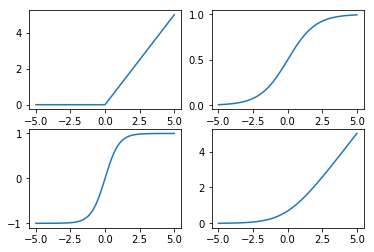

In [11]:
x = torch.linspace(-5,5,200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.subplot(221)
plt.plot(x_np,y_relu)
plt.subplot(222)
plt.plot(x_np,y_sigmoid)
plt.subplot(223)
plt.plot(x_np,y_tanh)
plt.subplot(224)
plt.plot(x_np,y_softplus)
plt.show()

回归

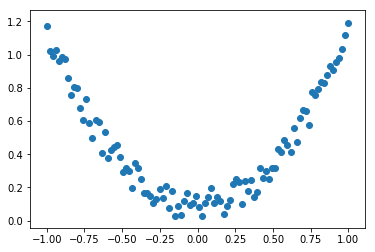

In [12]:
#将一维变2维，torch只会处理2维以上的数据
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x = Variable(x)
y = Variable(y)
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [13]:
class Demo(torch.nn.Module):
    def __init__(self):
        super(Demo,self).__init__()
    
    def forward(self):
        pass

In [14]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        #隐藏层，参数：输入数据的维数和输出神经元的个数
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        #输出层，参数：输入为隐藏层的神经元个数和输出最后输出神经元的个数
        self.predict = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        #预测层在回归问题中一般不用激励函数，因为激励函数会把结果的取值
        #限定在一个范围内
        x = self.predict(x)
        return x

In [15]:
net =  Net(1,10,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [16]:
#lr学习效率
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

In [17]:
for t in range(200): #训练步数
    prediction = net(x)
    
    loss = loss_func(prediction,y)
    if(t%50 == 0):
        print(loss)
    optimizer.zero_grad() #之前的梯度清零
    loss.backward()       #反向传播求梯度
    optimizer.step()      #梯度下降走一步

Variable containing:
 0.4209
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  8.6817
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  4.8917
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  3.9663
[torch.FloatTensor of size 1]



分类

In [18]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)
x,y = Variable(x),Variable(y)

In [19]:
class Net2(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net2,self).__init__()
        #隐藏层，参数：输入数据的维数和输出神经元的个数
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        #输出层，参数：输入为隐藏层的神经元个数和输出最后输出神经元的个数
        self.predict = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        #预测层在回归问题中一般不用激励函数，因为激励函数会把结果的取值
        #限定在一个范围内
        x = F.softmax(self.predict(x))
        return x

In [20]:
net2 = Net2(2,10,2) 
#输入为2维点，隐藏层有10个神经元，二分类问题用one-hot表示，所以输出为2维

In [21]:
#lr学习效率
optimizer = torch.optim.SGD(net2.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

In [22]:
for t in range(200): #训练步数
    prediction = net2(x)
    
    loss = loss_func(prediction,y)
    if(t%50 == 0):
        print(loss)
    optimizer.zero_grad() #之前的梯度清零
    loss.backward()       #反向传播求梯度
    optimizer.step()      #梯度下降走一步

Variable containing:
 0.6698
[torch.FloatTensor of size 1]

Variable containing:
 0.5035
[torch.FloatTensor of size 1]

Variable containing:
 0.4170
[torch.FloatTensor of size 1]

Variable containing:
 0.3808
[torch.FloatTensor of size 1]



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [23]:
print(prediction)

Variable containing:
 0.7312  0.2688
 0.8950  0.1050
 0.8041  0.1959
 0.9768  0.0232
 0.9056  0.0944
 0.9430  0.0570
 0.9523  0.0477
 0.9748  0.0252
 0.9689  0.0311
 0.9801  0.0199
 0.9339  0.0661
 0.9769  0.0231
 0.9751  0.0249
 0.9034  0.0966
 0.9133  0.0867
 0.9765  0.0235
 0.9572  0.0428
 0.9872  0.0128
 0.9160  0.0840
 0.9381  0.0619
 0.9241  0.0759
 0.9740  0.0260
 0.9350  0.0650
 0.9282  0.0718
 0.9864  0.0136
 0.9641  0.0359
 0.9927  0.0073
 0.9692  0.0308
 0.7720  0.2280
 0.9049  0.0951
 0.8148  0.1852
 0.9777  0.0223
 0.9597  0.0403
 0.9624  0.0376
 0.8973  0.1027
 0.8648  0.1352
 0.9838  0.0162
 0.9381  0.0619
 0.7972  0.2028
 0.9889  0.0111
 0.9357  0.0643
 0.8950  0.1050
 0.8526  0.1474
 0.9836  0.0164
 0.8821  0.1179
 0.9741  0.0259
 0.9089  0.0911
 0.9811  0.0189
 0.8492  0.1508
 0.9799  0.0201
 0.9887  0.0113
 0.8411  0.1589
 0.6513  0.3487
 0.9647  0.0353
 0.8857  0.1143
 0.7863  0.2137
 0.9514  0.0486
 0.9002  0.0998
 0.9104  0.0896
 0.9253  0.0747
 0.8698  0.1302
 0.

In [24]:
torch.save(net2,'net2.pkl')

/anaconda3/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Net2. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


保存

In [25]:
torch.save(net2.state_dict(),'net2_param.pkl')

In [26]:
net2 = torch.load('net2.pkl')

In [27]:
predict = net2(x)
print(predict)

Variable containing:
 0.7320  0.2680
 0.8957  0.1043
 0.8050  0.1950
 0.9770  0.0230
 0.9062  0.0938
 0.9435  0.0565
 0.9527  0.0473
 0.9751  0.0249
 0.9692  0.0308
 0.9804  0.0196
 0.9345  0.0655
 0.9771  0.0229
 0.9754  0.0246
 0.9040  0.0960
 0.9139  0.0861
 0.9768  0.0232
 0.9576  0.0424
 0.9874  0.0126
 0.9166  0.0834
 0.9386  0.0614
 0.9245  0.0755
 0.9742  0.0258
 0.9355  0.0645
 0.9287  0.0713
 0.9866  0.0134
 0.9645  0.0355
 0.9929  0.0071
 0.9695  0.0305
 0.7728  0.2272
 0.9056  0.0944
 0.8157  0.1843
 0.9779  0.0221
 0.9601  0.0399
 0.9628  0.0372
 0.8979  0.1021
 0.8656  0.1344
 0.9840  0.0160
 0.9386  0.0614
 0.7980  0.2020
 0.9891  0.0109
 0.9361  0.0639
 0.8957  0.1043
 0.8534  0.1466
 0.9838  0.0162
 0.8828  0.1172
 0.9743  0.0257
 0.9095  0.0905
 0.9813  0.0187
 0.8500  0.1500
 0.9801  0.0199
 0.9888  0.0112
 0.8419  0.1581
 0.6520  0.3480
 0.9651  0.0349
 0.8864  0.1136
 0.7871  0.2129
 0.9518  0.0482
 0.9008  0.0992
 0.9110  0.0890
 0.9258  0.0742
 0.8705  0.1295
 0.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [28]:
net2 = Net2(2,10,2)
net2.load_state_dict(torch.load('net2_param.pkl'))

In [29]:
predict = net2(Variable(torch.FloatTensor([10,10])))
print(predict)

Variable containing:
 1.0000e+00
 1.9140e-06
[torch.FloatTensor of size 2]



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


批数据训练

In [30]:
import torch.utils.data as Data
BATCH_SIZE = 5
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)

torch_dataset = Data.TensorDataset(data_tensor=x,target_tensor=y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, #是否随机
    num_workers=2,
)

for epoch in range(3):
    print('epoch',epoch,':')
    for step, (batch_x,batch_y) in enumerate(loader):
        print(batch_x.numpy(),'|',batch_y.numpy())

epoch 0 :
[ 3.  6.  2.  9.  4.] | [ 8.  5.  9.  2.  7.]
[  1.   7.  10.   8.   5.] | [ 10.   4.   1.   3.   6.]
epoch 1 :
[ 10.   7.   1.   3.   2.] | [  1.   4.  10.   8.   9.]
[ 5.  9.  8.  4.  6.] | [ 6.  2.  3.  7.  5.]
epoch 2 :
[  6.  10.   1.   4.   2.] | [  5.   1.  10.   7.   9.]
[ 8.  5.  3.  7.  9.] | [ 3.  6.  8.  4.  2.]


优化器<br>
SGD<br>
momentum(也是用SGD，不过加了momentum这个参数，视频中是设为0.8)<br>
RMSprop<br>
Adam<br>

### CNN

In [81]:
import torchvision #包含一些数据库
import torch.nn as nn

In [82]:
#超参数
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True

In [43]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    #改成tensor格式，和压缩到（0，1）
    transform=torchvision.transforms.ToTensor(), 
    download=DOWNLOAD_MNIST
)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


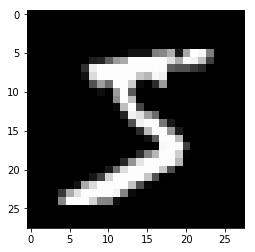

In [83]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.show()

In [90]:
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True, #是否随机
    num_workers=2,
)

In [91]:
test_data = torchvision.datasets.MNIST(root='./mnist',train=False)

In [92]:
test_x = Variable(torch.unsqueeze(test_data.test_data,dim=1),
                  volatile=True).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

In [63]:
print(test_x.size()) 
#unsqueeze加了BATCH_SIZE的维度,dim=1说明在第1维中插入

torch.Size([2000, 1, 28, 28])


In [69]:
print(test_data.test_data.size())

torch.Size([10000, 28, 28])


In [87]:
print(test_data.test_labels.size())

torch.Size([10000])


In [95]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d( #(1，28，28)
                in_channels=1,#输入图片的高度，彩色图片为3，黑白图片为1
                out_channels=16, #输出高度，可以看成有16个filters叠在一起扫描
                kernel_size=5, #过滤器维度
                stride=1, #步长
                padding=2 # if stride=1,padding=(kernel_size-1)/2
            ), #->(16,28,28)
            nn.ReLU(),#->(16,28,28)
            nn.MaxPool2d(kernel_size=2), #可以想象成另一个filter
            #->(16,14,14)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2), #->(32,14,14)
            nn.ReLU(), # ->(32,14,14)
            nn.MaxPool2d(2) #->(32,7,7)
        )
        self.out = nn.Linear(32*7*7,10) #输入要展平，输出因为有10类（10个数字）
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x) #(batch,32,7,7)
        x = x.view(x.size(0),-1) #(batch,32*7*7)
        output = self.out(x)
        return output

In [117]:
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        output = cnn(b_x)
        loss = loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / test_y.size(0)
            print("train loss:",loss.data[0],'|','accuracy:',accuracy)

train loss: 2.3019678592681885 | accuracy: 0.1305
train loss: 0.4599365293979645 | accuracy: 0.8205
train loss: 0.13245519995689392 | accuracy: 0.901
train loss: 0.5097387433052063 | accuracy: 0.9125
train loss: 0.1347232311964035 | accuracy: 0.936
train loss: 0.1962229311466217 | accuracy: 0.947
train loss: 0.09001033008098602 | accuracy: 0.9415
train loss: 0.055662188678979874 | accuracy: 0.9565
train loss: 0.22798699140548706 | accuracy: 0.952
train loss: 0.128178209066391 | accuracy: 0.9635
train loss: 0.18648329377174377 | accuracy: 0.9565
train loss: 0.06422994285821915 | accuracy: 0.9635
train loss: 0.1151735708117485 | accuracy: 0.9615
train loss: 0.14468316733837128 | accuracy: 0.9635
train loss: 0.03337810933589935 | accuracy: 0.968
train loss: 0.057695526629686356 | accuracy: 0.975
train loss: 0.05144820734858513 | accuracy: 0.9795
train loss: 0.16215918958187103 | accuracy: 0.971
train loss: 0.02815297059714794 | accuracy: 0.98
train loss: 0.006536298897117376 | accuracy: 0

In [128]:
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output,1)[1].data.numpy()
print(pred_y,'prediction number')
print(test_y[:10].numpy(),'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


下面是为什么使用(un)squeeze的理由

In [126]:
for step,(x,y) in enumerate(train_loader):
    print(x.size())
    print(x.squeeze().size())
    if step == 5:
        break

torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28])
torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28])
torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28])
torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28])
torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28])
torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28])


In [133]:
torch.max(torch.Tensor([[1,2,3,4,5],[6,7,8,9,10]]))

10.0

In [138]:
torch.max(torch.Tensor([[1,2,3,4,5],[6,7,8,9,10]]),1)

(
   5
  10
 [torch.FloatTensor of size 2], 
  4
  4
 [torch.LongTensor of size 2])

torch.squeeze

torch.squeeze(input, dim=None, out=None)
将输入张量形状中的1 去除并返回。 如果输入是形如(A×1×B×1×C×1×D)，那么输出形状就为： (A×B×C×D)
当给定dim时，那么挤压操作只在给定维度上。例如，输入形状为: (A×1×B), squeeze(input, 0) 将会保持张量不变，只有用 squeeze(input, 1)，形状会变成 (A×B)。

注意： 返回张量与输入张量共享内存，所以改变其中一个的内容会改变另一个。

参数:

input (Tensor) – 输入张量
dim (int, optional) – 如果给定，则input只会在给定维度挤压
out (Tensor, optional) – 输出张量

torch.unsqueeze

torch.unsqueeze(input, dim, out=None)
返回一个新的张量，对输入的制定位置插入维度 1

注意： 返回张量与输入张量共享内存，所以改变其中一个的内容会改变另一个。

如果dim为负，则将会被转化dim+input.dim()+1
参数:

tensor (Tensor) – 输入张量
dim (int) – 插入维度的索引
out (Tensor, optional) – 结果张量

### RNN

In [146]:
EPOCH = 1
BATCH_SIZE = 64
TIME_STEP = 28 #rnn time step/image height
INPUT_SIZE = 28 #rnn input size/image width
LR = 0.01
DOWNLOAD_MNIST = False
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)


In [172]:
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True, #是否随机
    num_workers=2,
)
test_data = torchvision.datasets.MNIST(root='./mnist',
                                       train=False,
                                      transform=torchvision.transforms.ToTensor())
test_x = Variable(test_data.test_data,
                  volatile=True).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels.numpy().squeeze()[:2000]

In [173]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=64,
            num_layers=1,
            batch_first=True, #(batch,time_step,input)
        )
        self.out = nn.Linear(64,10)
    
    def forward(self,x):
        r_out,(h_n,h_c) = self.rnn(x,None) 
        # x(batch,time_step,input_size)
        # None是指没初始的hidden state
        out = self.out(r_out[:,-1,:])
        return out

In [186]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [187]:
optimizer = torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()
for epoch in range(EPOCH):
    for step,(x,y) in enumerate(train_loader):
        b_x = Variable(x.squeeze())
        b_y = Variable(y)
        output = rnn(b_x)
        loss = loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50 == 0:
            test_output = rnn(test_x)
            pred_y = torch.max(test_output,1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / test_y.size
            print("train loss:",loss.data[0],'|','accuracy:',accuracy)

train loss: 2.3018622398376465 | accuracy: 0.116
train loss: 0.781937301158905 | accuracy: 0.6
train loss: 0.9549441337585449 | accuracy: 0.711
train loss: 0.7302921414375305 | accuracy: 0.748
train loss: 0.5319693088531494 | accuracy: 0.85
train loss: 0.26437437534332275 | accuracy: 0.879
train loss: 0.2926117777824402 | accuracy: 0.9125
train loss: 0.22128325700759888 | accuracy: 0.912
train loss: 0.14532454311847687 | accuracy: 0.913
train loss: 0.17114056646823883 | accuracy: 0.9255
train loss: 0.06482797116041183 | accuracy: 0.9315
train loss: 0.30730584263801575 | accuracy: 0.931
train loss: 0.1360687017440796 | accuracy: 0.951
train loss: 0.18281289935112 | accuracy: 0.9275
train loss: 0.26453647017478943 | accuracy: 0.9465
train loss: 0.14338654279708862 | accuracy: 0.946
train loss: 0.13650457561016083 | accuracy: 0.959
train loss: 0.19890643656253815 | accuracy: 0.9525
train loss: 0.30525192618370056 | accuracy: 0.957


In [194]:
TIME_STEP =10
LR = 0.02
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.out = nn.Linear(32,1)
        
    def forward(self,x,h_state):
        r_out, h_state = self.rnn(x,h_state) #输入一个序列，h_state是最后一步的hidden state
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
            
        return torch.stack(outs,dim=1),h_state

In [201]:
rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(),lr = LR)
loss_func = nn.MSELoss()
h_state = None
for step in range(2):
    start,end=step*np.pi,(step+1)*np.pi
    steps = np.linspace(start,end,TIME_STEP,dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = Variable(torch.from_numpy(x_np[np.newaxis,:,np.newaxis]))
    print(x) #shape(batch,time_step,input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis,:,np.newaxis]))
    
    prediction, h_state = rnn(x,h_state)
    h_state = Variable(h_state.data)
    
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print(loss.data)

Variable containing:
(0 ,.,.) = 
  0.0000
  0.3420
  0.6428
  0.8660
  0.9848
  0.9848
  0.8660
  0.6428
  0.3420
 -0.0000
[torch.FloatTensor of size 1x10x1]

Variable containing:
(0 ,.,.) = 
 -8.7423e-08
 -3.4202e-01
 -6.4279e-01
 -8.6603e-01
 -9.8481e-01
 -9.8481e-01
 -8.6603e-01
 -6.4279e-01
 -3.4202e-01
  1.7485e-07
[torch.FloatTensor of size 1x10x1]



AutoEncoder

In [2]:
import torch.nn as nn
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,3),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid(),
        )
    
    def forward(self,x):
        encoded = self.encoder(x)
        decoder = eslf.decoder(encoded)
        return encoded,decoded
    